# EDA del archivo Accesos a Internet fijo por tecnologia y localidad

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#importo 
ruta_al_archivo = '../DATA/15-Accesos a Internet fijo por tecnologia y localidad.csv'
df = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [3]:
#observo resultado
df.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [4]:
# Convertir la columna 'FIBRA OPTICA' a tipo numérico, ya que parece que contiene números y texto
df['FIBRA OPTICA'] = pd.to_numeric(df['FIBRA OPTICA'], errors='coerce')

# Agrupar por año y sumar la columna 'FIBRA OPTICA'
df_agrupado = df.groupby('Link Indec')['FIBRA OPTICA'].sum().reset_index()

**Provincia**: *Nombre de la provincia en Argentina*

**Partido**: *Nombre del partido en la provincia*

**Localidad**:* Nombre de la localidad dentro del partido*

**Link Indec**: *Identificador del INDEC para la localidad*

**ADSL**: *Número de conexiones a Internet por ADSL*.es una tecnología de transmisión de datos de banda ancha que utiliza líneas telefónicas estándar de cobre para proporcionar acceso a Internet de alta velocidad.La tecnología ADSL es "asimétrica" debido a que permite una mayor velocidad de descarga de datos que de carga. Esta tecnología se ha utilizado ampliamente en áreas donde las conexiones de banda ancha más rápidas, como la fibra óptica, no están disponibles.

**CABLEMODEM**: *Número de conexiones a Internet por cable módem*. El cable módem es un dispositivo que permite a los usuarios de servicios de televisión por cable tener acceso a Internet de alta velocidad. Los servicios de Internet a través de cable módem suelen ofrecer velocidades de conexión más rápidas que las tecnologías de conexión tradicionales como el DSL (Digital Subscriber Line) y el dial-up. Además, es una opción popular en áreas donde no está disponible la fibra óptica

**DIAL UP**: *Número de conexiones a Internet por Dial Up*. Dial-up se refiere a un método de conexión a Internet que utiliza la red telefónica conmutada (RTC) para establecer una conexión temporal a través de un módem. Sin embargo, debido a su velocidad de transferencia de datos relativamente lenta en comparación con las tecnologías modernas, como DSL, cable módem y fibra óptica, el acceso a Internet por dial-up ha sido ampliamente reemplazado por estas tecnologías más rápidas y eficientes. 

**FIBRA OPTICA**: *Número de conexiones a Internet por fibra óptica*. La fibra óptica es una tecnología de transmisión de datos que utiliza hilos delgados y flexibles hechos de vidrio o plástico para transmitir datos en forma de pulsos de luz. En el contexto de las telecomunicaciones, la fibra óptica se utiliza para transmitir señales de Internet, televisión y telefonía a largas distancias con velocidades de transmisión extremadamente rápidas y con un alto ancho de banda.

**OTROS**: *Número de otras conexiones a Internet*

**SATELITAL**: *Número de conexiones a Internet vía satélite*. Si bien la conexión satelital proporciona acceso a Internet en áreas donde la infraestructura terrestre es limitada, tiene algunas limitaciones en términos de velocidad y latencia en comparación con otras tecnologías de banda ancha.

**WIMAX**: *Número de conexiones a Internet por WiMax* .  Significa Worldwide Interoperability for Microwave Access, es una tecnología de comunicaciones inalámbricas que proporciona conexiones de banda ancha de larga distancia. WiMAX se utiliza para proporcionar acceso a Internet de alta velocidad a larga distancia en áreas metropolitanas y rurales.

**WIRELESS**: *Número de conexiones a Internet inalámbricas*. El término "wireless" en el contexto de las tecnologías de conexión a Internet generalmente se refiere a la conectividad inalámbrica que permite la transmisión de datos a través de ondas de radio en lugar de cables físicos. En este contexto, "wireless" puede referirse a una variedad de tecnologías inalámbricas, incluyendo Wi-Fi, Bluetooth y otras tecnologías de comunicación de corto y largo alcance.

**Total general**: *Total general de conexiones a Internet*

In [5]:
#Se ve la composicion
df.info()#Unnamed: 13 nula, se elimina

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   1087 non-null   float64
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(2), object(12)
memory usage: 343.2+ KB


In [6]:
df = df.drop('Unnamed: 13', axis=1) #Se elimina la columna por estar vacia

In [7]:
#compruebo cantidad de provincias
num_provincias = df['Provincia'].nunique()
print(f"El número de provincias únicas es: {num_provincias}")

El número de provincias únicas es: 24


In [8]:
df=df.replace('- 0', '0')

In [9]:
columnas_a_reemplazar = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']

# Reemplazar ',' por '.' en las columnas especificadas
df[columnas_a_reemplazar] = df[columnas_a_reemplazar].replace({',': '.'}, regex=True)

# Convertir las columnas a tipo numérico si es necesario
df[columnas_a_reemplazar] = df[columnas_a_reemplazar].apply(pd.to_numeric, errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   float64
 5   CABLEMODEM     3137 non-null   float64
 6   DIAL UP        3137 non-null   float64
 7   FIBRA OPTICA   1087 non-null   float64
 8   OTROS          3137 non-null   float64
 9   SATELITAL      3137 non-null   int64  
 10  WIMAX          3137 non-null   int64  
 11  WIRELESS       3137 non-null   float64
 12  Total general  3137 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 318.7+ KB


Creamos algunos graficos para ver la distribucion de estas tecnologias


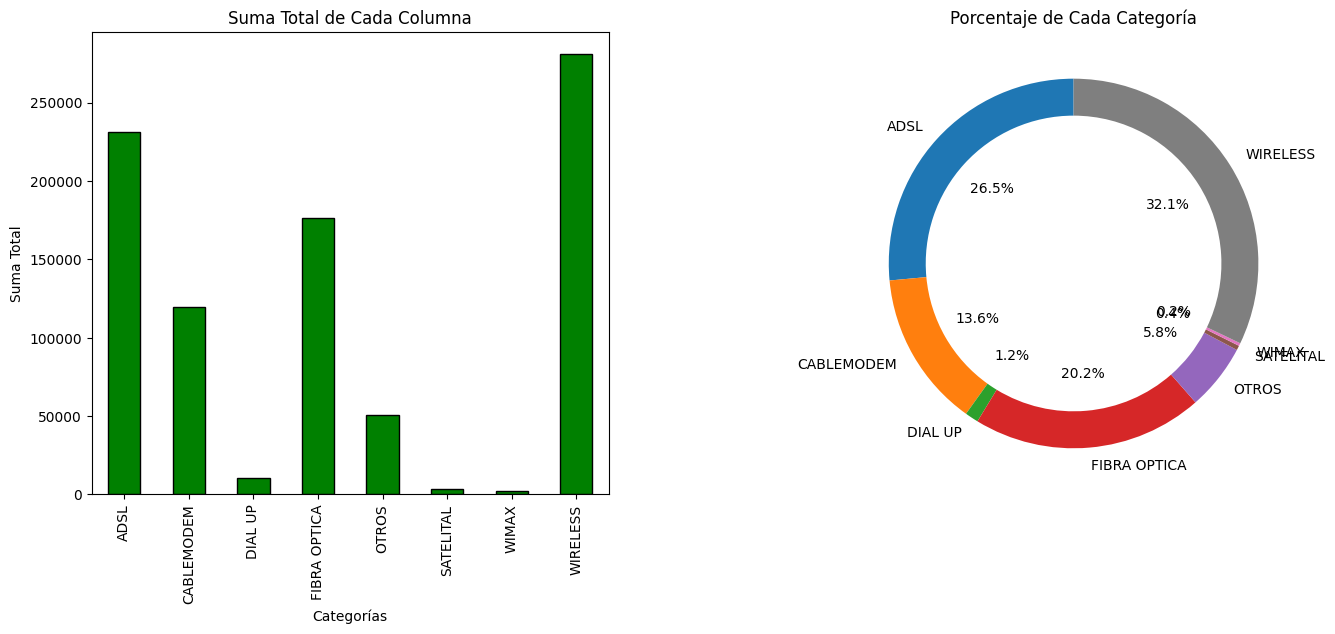

In [11]:
# Filtrar las columnas de interés
columnas_interes = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Crear una figura y un arreglo de subgráficos (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
df[columnas_interes].sum().plot(kind='bar', ax=axs[0], rot=45, color='green', edgecolor='black')
axs[0].set_title('Suma Total de Cada Columna')
axs[0].set_xlabel('Categorías')
axs[0].set_ylabel('Suma Total')
axs[0].tick_params(axis='x', rotation=90)

# Gráfico de torta
df[columnas_interes].sum().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.2))
axs[1].set_title('Porcentaje de Cada Categoría')

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(wspace=0.4)

# Mostrar el gráfico
plt.show()

wireless adsl y fibra optica predominan en ese orden

Creamos otros graficos para algunas provincias al azar

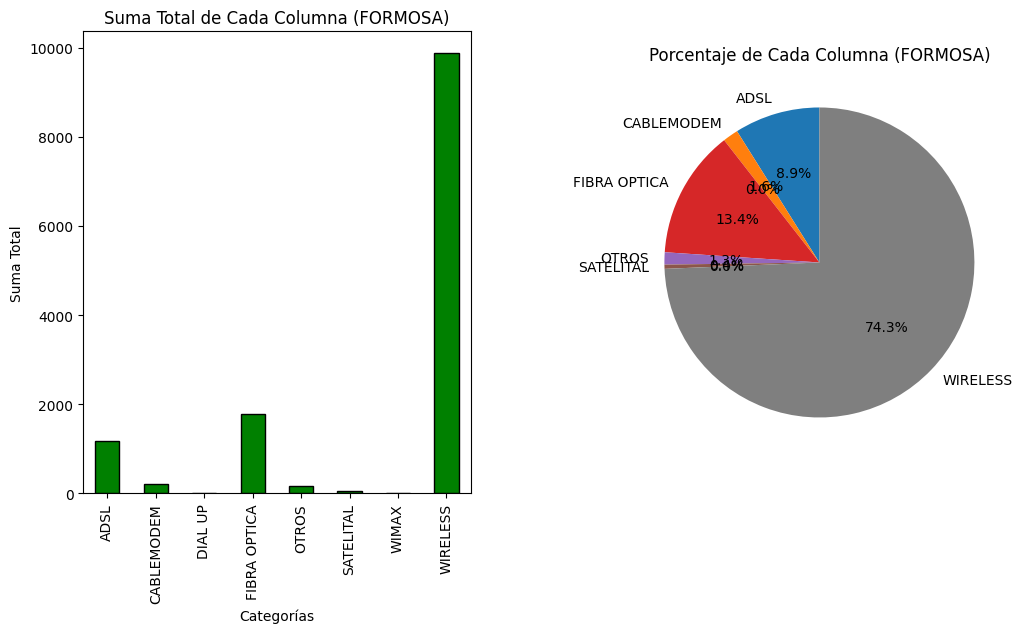

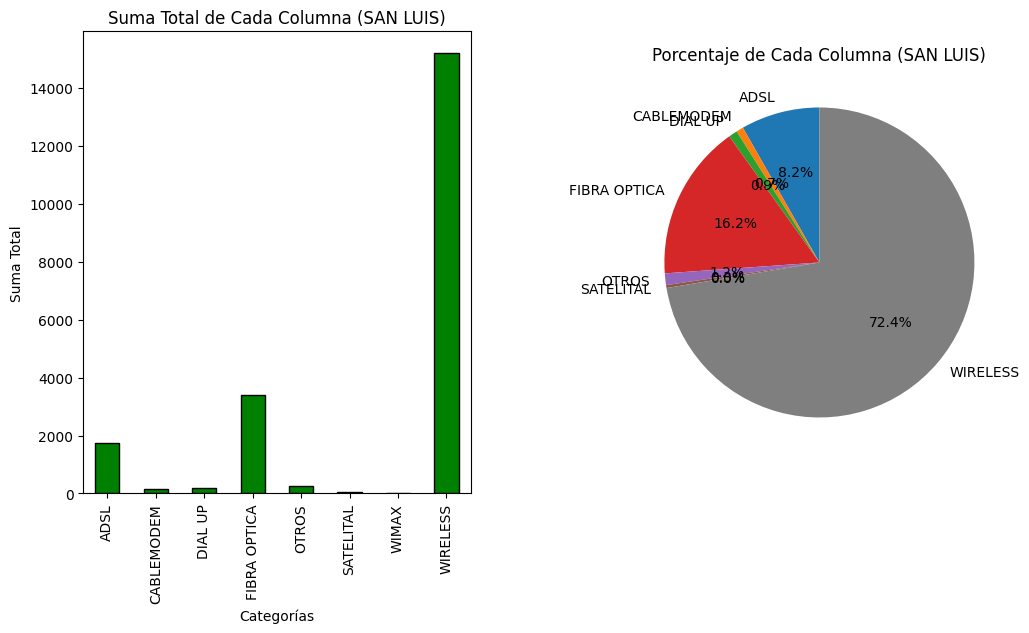

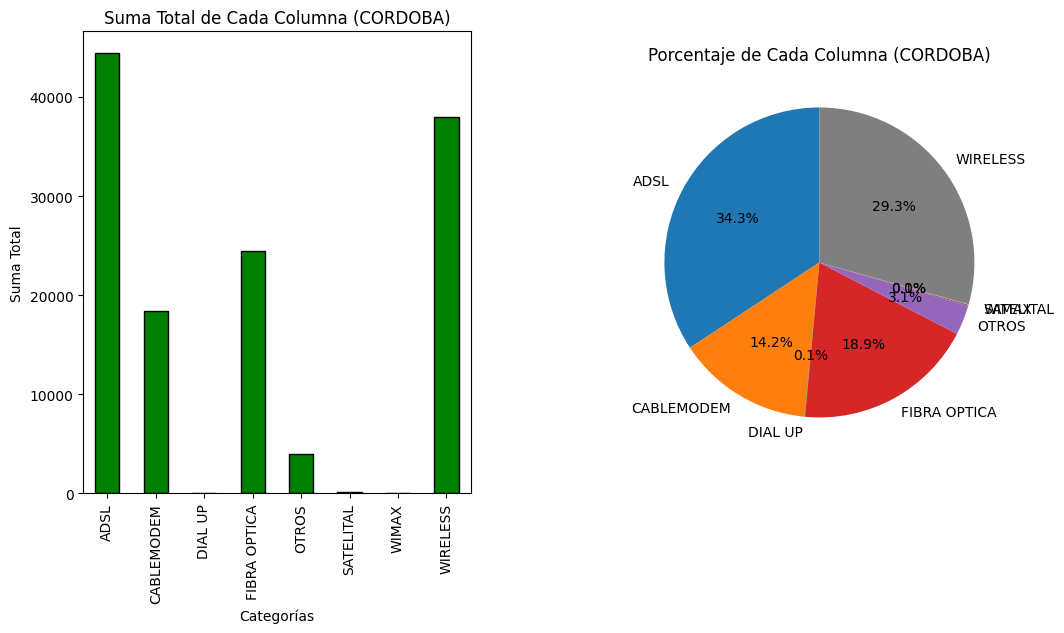

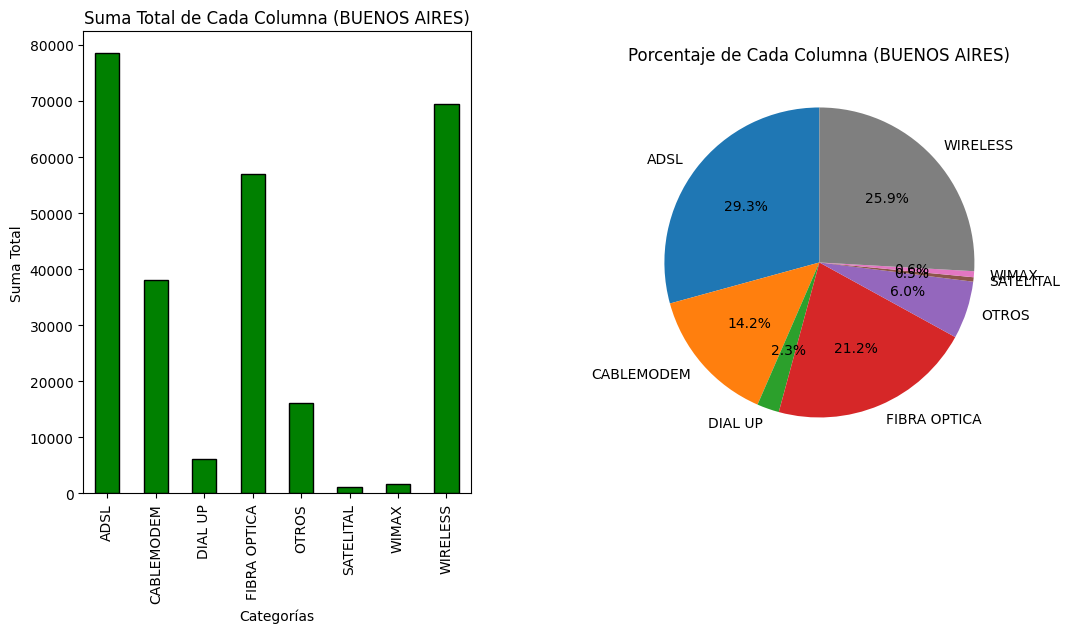

In [12]:
# Lista de provincias de interés
provincias_interes = ['FORMOSA', 'SAN LUIS', 'CORDOBA', 'BUENOS AIRES']

# Iterar sobre las provincias y crear un gráfico para cada una
for provincia in provincias_interes:
    # Filtrar el DataFrame por la provincia actual
    df_provincia = df[df['Provincia'] == provincia]
    
    # Crear una figura y un arreglo de subgráficos (1 fila, 2 columnas)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Gráfico de barras
    df_provincia[columnas_interes].sum().plot(kind='bar', ax=axs[0], rot=45, color='green', edgecolor='black')
    axs[0].set_title(f'Suma Total de Cada Columna ({provincia})')
    axs[0].set_xlabel('Categorías')
    axs[0].set_ylabel('Suma Total')
    axs[0].tick_params(axis='x', rotation=90)

    # Gráfico de torta
    df_provincia[columnas_interes].sum().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90)
    axs[1].set_title(f'Porcentaje de Cada Columna ({provincia})')
    axs[1].set_ylabel('')

    # Ajustar el espacio entre los subgráficos
    plt.subplots_adjust(wspace=0.4)

    # Mostrar el gráfico
    plt.show()

Se observa que tanto en San Luis como en Formosa hay un gran porcentaje de wireless, mientras que en Cordoba y Bs As predomina el ADSL  y esta mas desarrollada la fibra optica. Eso explica el mejor promedio de velocidad de estas.

## Exporto csv para usar en power bi

In [13]:
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Proyecto-individual-2-Data-Analisis\DATA PowerBi'
nombre_archivo = 'Accesos a Internet fijo por tecnologia y localidad.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df.to_csv(ruta_completa, index=False)